<a href="https://colab.research.google.com/github/ToyTeX/Notebooks/blob/main/HairyBall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

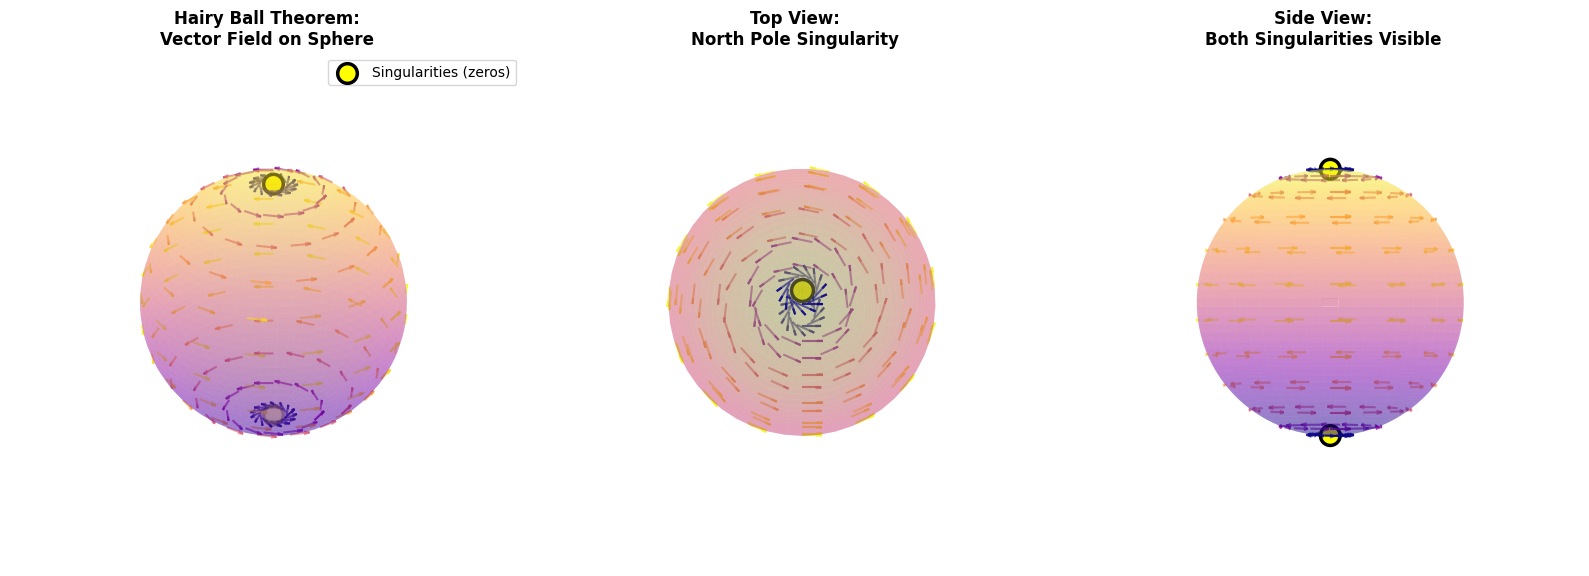


The HAIRY BALL THEOREM:

The Hairy Ball Theorem states:
  'There is no continuous tangent vector field on a sphere that is
   nowhere zero.'

In other words, you can't comb a hairy ball flat without creating
a cowlick (a point where the hair has no defined direction).

This visualization shows a tangent vector field on the unit sphere with 
yellow dots marking the singularities (zeros) at the north and south poles
and vectors flowing around latitude circles, their magnitude approaching zero 
as they approach the poles.

This theorem is a topological consequence: 
The Euler characteristic of a sphere is 2. By the Poincaré-Hopf theorem, 
any vector field on a sphere must have singularities whose indices sum to 2.

Applications include existence of low-pressure points in the earth's atmosphere 
at any given time and other wind/weather patterns!


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# The Hairy Ball Theorem states that there is no continuous tangent vector field
# on a sphere that is nowhere zero. We will visualize this with a vector field
# on the sphere that necessarily has zeros (singularities).

def sphere_coordinates(theta, phi):
    """Convert spherical to Cartesian coordinates"""
    x = np.sin(phi) * np.cos(theta)
    y = np.sin(phi) * np.sin(theta)
    z = np.cos(phi)
    return x, y, z

def tangent_vector_field(theta, phi):
    """
    Define a tangent vector field on the sphere.
    This field will have singularities at the poles (phi=0 and phi=pi).

    We create vectors tangent to the sphere that "flow" around latitude lines.
    The field is zero at the poles, demonstrating the hairy ball theorem.
    """
    # Tangent vectors in spherical coordinates
        # scaled by sin(phi) so they vanish at the poles

    v_theta = np.sin(phi)  # zeros at poles
    v_phi = 0  # No component in phi direction

    # Convert tangent vectors to Cartesian coordinates
    # Basis vectors in spherical coordinates:

    vx = v_theta * (-np.sin(theta)) + v_phi * (np.cos(phi) * np.cos(theta))
    vy = v_theta * np.cos(theta) + v_phi * (np.cos(phi) * np.sin(theta))
    vz = v_phi * (-np.sin(phi))

    return vx, vy, vz

# Create sphere surface
theta = np.linspace(0, 2*np.pi, 50)
phi = np.linspace(0, np.pi, 50)
THETA, PHI = np.meshgrid(theta, phi)
X, Y, Z = sphere_coordinates(THETA, PHI)

# Create vector field for visualization
theta_vec = np.linspace(0, 2*np.pi, 16)
phi_vec = np.linspace(0.1, np.pi-0.1, 12)  # Avoid exact poles for visualization
THETA_VEC, PHI_VEC = np.meshgrid(theta_vec, phi_vec)
X_vec, Y_vec, Z_vec = sphere_coordinates(THETA_VEC, PHI_VEC)

# Calculate vector field
VX, VY, VZ = tangent_vector_field(THETA_VEC, PHI_VEC)

# Normalize vectors for better visualization
magnitude = np.sqrt(VX**2 + VY**2 + VZ**2)
magnitude = np.where(magnitude == 0, 1, magnitude)  # Avoid division by zero

# Create colors based on magnitude using plasma colormap
from matplotlib.colors import Normalize
norm = Normalize(vmin=magnitude.min(), vmax=magnitude.max())
colors = cm.plasma(norm(magnitude))

VX_norm = VX / magnitude * 0.15
VY_norm = VY / magnitude * 0.15
VZ_norm = VZ / magnitude * 0.15

# Create  plot
fig = plt.figure(figsize=(16, 6))

# First subplot: Sphere with vector field
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(X, Y, Z, alpha=0.3, cmap=cm.plasma,
                 linewidth=0, antialiased=True)

# Plot vectors with plasma colors based on magnitude
for i in range(X_vec.shape[0]):
    for j in range(X_vec.shape[1]):
        ax1.quiver(X_vec[i,j], Y_vec[i,j], Z_vec[i,j],
                   VX_norm[i,j], VY_norm[i,j], VZ_norm[i,j],
                   color=colors[i,j], alpha=0.6,
                   arrow_length_ratio=0.3, linewidth=1.5)

# Mark singularities (poles)
ax1.scatter([0, 0], [0, 0], [1, -1], color='yellow', s=200,
            marker='o', edgecolors='black', linewidths=2.5,
            label='Singularities (zeros)', zorder=5)

ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_title('Hairy Ball Theorem:\nVector Field on Sphere', fontsize=12, fontweight='bold')
ax1.legend()
ax1.set_box_aspect([1,1,1])
ax1.set_axis_off() # Make axes neat

# Second subplot: Top view
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_surface(X, Y, Z, alpha=0.3, cmap=cm.plasma,
                 linewidth=0, antialiased=True)
for i in range(X_vec.shape[0]):
    for j in range(X_vec.shape[1]):
        ax2.quiver(X_vec[i,j], Y_vec[i,j], Z_vec[i,j],
                   VX_norm[i,j], VY_norm[i,j], VZ_norm[i,j],
                   color=colors[i,j], alpha=0.6,
                   arrow_length_ratio=0.3, linewidth=1.5)
ax2.scatter([0], [0], [1], color='yellow', s=250, marker='o',
            edgecolors='black', linewidths=2.5, zorder=5)
ax2.view_init(elev=85, azim=0)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_title('Top View:\nNorth Pole Singularity', fontsize=12, fontweight='bold')
ax2.set_box_aspect([1,1,1])
ax2.set_axis_off()

# Third subplot: Side view
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot_surface(X, Y, Z, alpha=0.3, cmap=cm.plasma,
                 linewidth=0, antialiased=True)
for i in range(X_vec.shape[0]):
    for j in range(X_vec.shape[1]):
        ax3.quiver(X_vec[i,j], Y_vec[i,j], Z_vec[i,j],
                   VX_norm[i,j], VY_norm[i,j], VZ_norm[i,j],
                   color=colors[i,j], alpha=0.6,
                   arrow_length_ratio=0.3, linewidth=1.5)
ax3.scatter([0, 0], [0, 0], [1, -1], color='yellow', s=200, marker='o',
            edgecolors='black', linewidths=2.5, zorder=5)
ax3.view_init(elev=0, azim=0)
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('Z')
ax3.set_title('Side View:\nBoth Singularities Visible', fontsize=12, fontweight='bold')
ax3.set_box_aspect([1,1,1])
ax3.set_axis_off()

plt.tight_layout()
plt.show()

# Print description
print("\n" + "=" * 80)
print("The HAIRY BALL THEOREM:")
print("=" * 80)
print()
print("The Hairy Ball Theorem states:")
print("  'There is no continuous tangent vector field on a sphere that is")
print("   nowhere zero.'")
print()
print("In other words, you can't comb a hairy ball flat without creating")
print("a cowlick (a point where the hair has no defined direction).")
print()
print("This visualization shows a tangent vector field on the unit sphere with ")
print("yellow dots marking the singularities (zeros) at the north and south poles")
print("and vectors flowing around latitude circles, their magnitude approaching zero ")
print("as they approach the poles.")
print()
print("This theorem is a topological consequence: ")
print("The Euler characteristic of a sphere is 2. By the Poincaré-Hopf theorem, ")
print("any vector field on a sphere must have singularities whose indices sum to 2.")
print()
print("Applications include existence of low-pressure points in the earth's atmosphere ")
print("at any given time and other wind/weather patterns!")
print("=" * 80)